## Handling multiple data for radial/azimuthal analysis.


### version 1.3.0  Oct 10, 2021 JS

This script consists of 3 parts: 1) reading multiple.raw data, 2) conversion from cylindrical to cartesian coodinates, 3) save three types of image data in npz format,  4)save 3-image figure in jpeg format, 

In [1]:
### XRAY_28_DES_2020
### cylindirical coordinate is converted to carteresian coordinate by linear interpolation
### 

from common.xray import *
%matplotlib inline


100%|██████████| 2400/2400 [00:23<00:00, 102.83it/s]


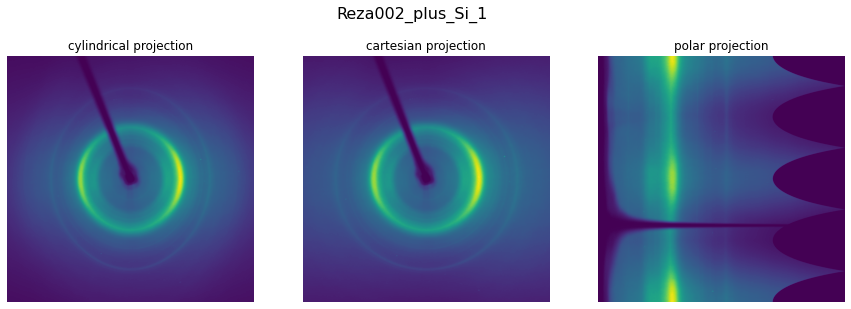

100%|██████████| 2400/2400 [00:24<00:00, 99.50it/s] 


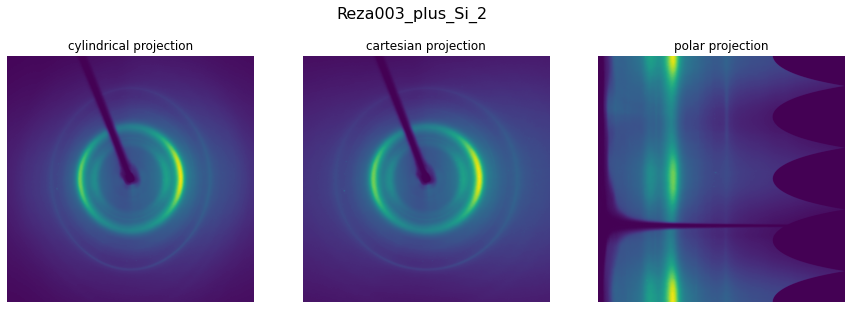

100%|██████████| 2400/2400 [00:22<00:00, 104.53it/s]


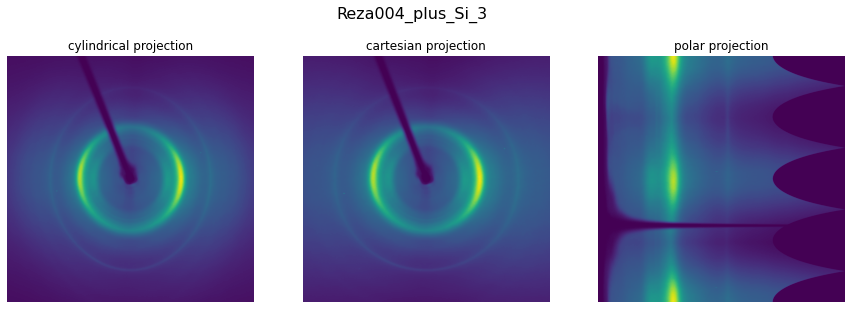

100%|██████████| 2400/2400 [00:22<00:00, 108.56it/s]


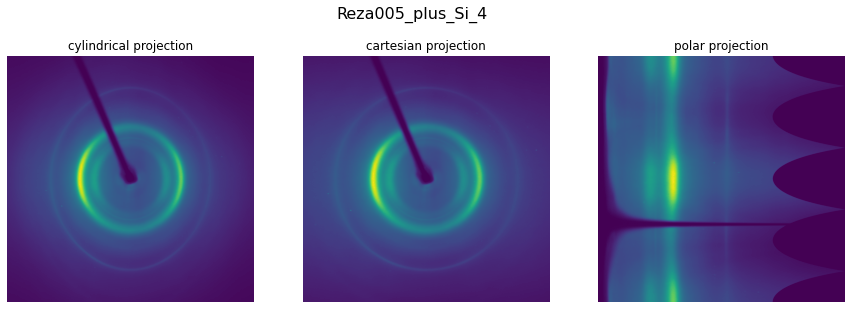

100%|██████████| 2400/2400 [00:21<00:00, 109.98it/s]


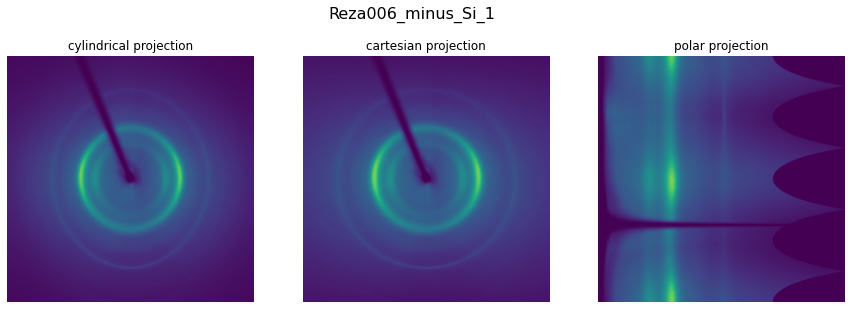

100%|██████████| 2400/2400 [00:21<00:00, 110.63it/s]


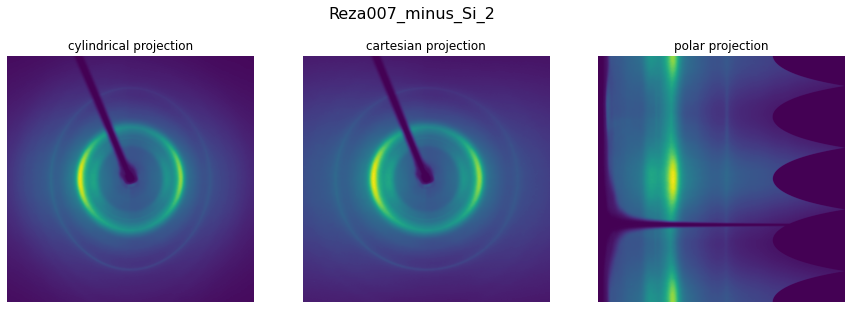

100%|██████████| 2400/2400 [00:22<00:00, 108.65it/s]


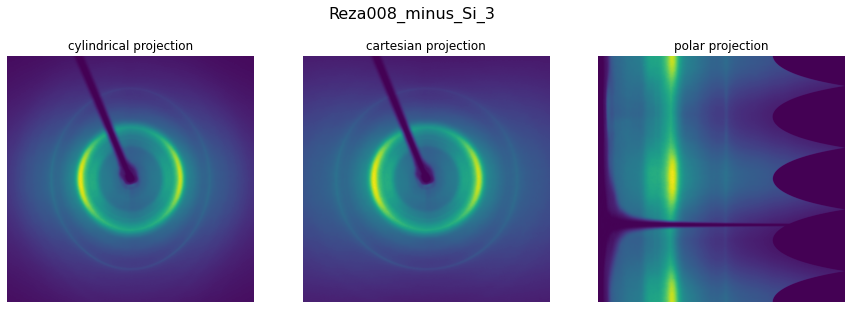

100%|██████████| 2400/2400 [00:22<00:00, 106.84it/s]


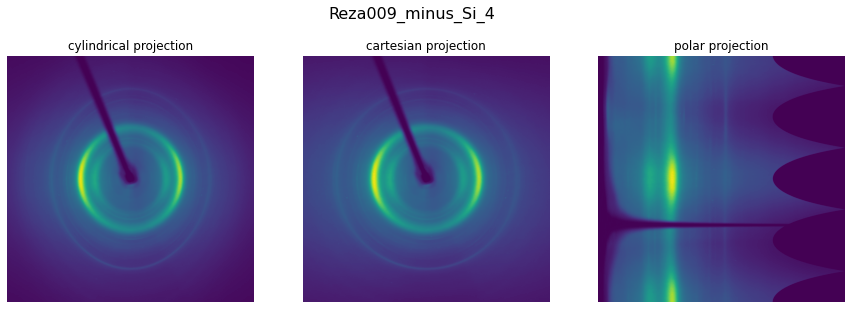

In [3]:
# this program needs Class RigakuRapid2()
XRAY=RigakuRapid2()
my_data_path='Reza_1st'
in_path,profile_path,image_path,figure_path,peakfit_path=XRAY.create_dir(my_data_path)

xrd_names=sorted([filename for filename in os.listdir(in_path) if not filename.startswith('.')])

for fnm in xrd_names:
    fn=fnm.split('.')[0]
    im=XRAY.imread(os.path.join(in_path,fnm))
    out=XRAY.conv_set(im)
    np.save(os.path.join(image_path,fn),out)

    fig, axes = plt.subplots(ncols=3,figsize=(15,5))
    ids=['cylindrical projection', 'cartesian projection', 'polar projection']

    for i in range(3):
        axes[i].set_title(ids[i])
        axes[i].imshow(out[:,:,i])
        axes[i].axis('off')
    fig.suptitle(fn, fontsize=16)
    plt.savefig(os.path.join(image_path,fn+'.jpg'),dpi=300)
    plt.show()


End of programs. Results are in the directory ./results